<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EE25737:-Introduction-to-Machine-Learning" data-toc-modified-id="EE25737:-Introduction-to-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="black">EE25737: Introduction to Machine Learning</font></a></span><ul class="toc-item"><li><span><a href="#Implementation-of-some-algorithms-by-NumPy/SciPy" data-toc-modified-id="Implementation-of-some-algorithms-by-NumPy/SciPy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation of some algorithms by NumPy/SciPy</a></span><ul class="toc-item"><li><span><a href="#[your-name]" data-toc-modified-id="[your-name]-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>[your name]</a></span></li><li><span><a href="#[your-ID]" data-toc-modified-id="[your-ID]-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>[your ID]</a></span></li></ul></li><li><span><a href="#2.-Logistic-regression" data-toc-modified-id="2.-Logistic-regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Logistic regression</a></span></li><li><span><a href="#3.-Online-Linear-Regression" data-toc-modified-id="3.-Online-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Online Linear Regression</a></span></li></ul></li></ul></div>

# <font color='black'>EE25737: Introduction to Machine Learning</font>
## Implementation of some algorithms by NumPy/SciPy

### Omid Sharafi
### 96101838

In this assignment, you will implement some learning algorithms only using Linalg and without using scikit-learn.


## Imports

In [53]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

###### Load data


## 2. Logistic regression

Import data with pandas library.
Print the first five row of the data. There are 14 column in dataset. The first 12 are features and the quality column is the label.

In [166]:
# load dataset 
data = pd.read_csv("JuiceQuality.csv")
data = data.loc[:, 'fixed acidity':'quality']
display(data.head(5))

# X=
X = data.loc[:, 'fixed acidity':'Vit Indx']
print(type(X))

# y=
Y = data.loc[:, 'quality':'quality']
print(type(Y))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,A Indx,density,pH,sulphates,Vit Indx,quality
0,5.9,0.32,0.39,low,0.114,24.0,140.0,13.905151,0.99340,3.09,low,very_low,high
1,7.8,0.24,0.18,high,0.046,33.0,160.0,17.130070,0.99630,3.20,medium,low,high
2,7.7,0.58,0.01,very_low,0.088,12.0,18.0,15.618966,0.99568,NaN,medium,low,high
3,8.3,0.18,0.30,very_low,0.033,20.0,57.0,18.085322,0.99109,3.02,medium,medium,high
4,6.5,NaN,0.31,very_low,0.044,NaN,127.0,13.968160,0.99280,3.49,low,low,high


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In this section, you need to prepare your data. One of the problems you may face in datasets are missing values. There are various strategies to treat missing values. First, you can delete any sample with missing values. Another method is to fill missing values with mean of the feature. 

In [167]:
# No meaning for replace missing values when there is no valuse so we replace words with proper values
replacer = {
    'residual sugar' : {'very_low' : 1, 'low' : 2, 'medium' : 3, 'high' : 4, 'very_high' : 5}, 
    'sulphates' : {'low' : 1, 'medium' : 2, 'high' : 3, 'very_high' : 4},
    'Vit Indx' : {'very_low' : 1, 'low': 2, 'medium' : 3, 'high' : 4, 'very_high' : 5},
}
X.replace(replacer,inplace = True)
display(X)

#binary labels
label = {
    'quality' : {'low': 0,'high': 1} 
}
Y.replace(label,inplace = True)
display(Y)

data_replacer = {
    'residual sugar' : {'very_low' : 1, 'low' : 2, 'medium' : 3, 'high' : 4, 'very_high' : 5}, 
    'sulphates' : {'low' : 1, 'medium' : 2, 'high' : 3, 'very_high' : 4},
    'Vit Indx' : {'very_low' : 1, 'low': 2, 'medium' : 3, 'high' : 4, 'very_high' : 5},
    'quality' : {'low': 0,'high': 1} 
}

data.replace(data_replacer,inplace = True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,A Indx,density,pH,sulphates,Vit Indx
0,5.9,0.32,0.39,2.0,0.114,24.0,140.0,13.905151,0.99340,3.09,1.0,1.0
1,7.8,0.24,0.18,4.0,0.046,33.0,160.0,17.130070,0.99630,3.20,2.0,2.0
2,7.7,0.58,0.01,1.0,0.088,12.0,18.0,15.618966,0.99568,NaN,2.0,2.0
3,8.3,0.18,0.30,1.0,0.033,20.0,57.0,18.085322,0.99109,3.02,2.0,3.0
4,6.5,NaN,0.31,1.0,0.044,NaN,127.0,13.968160,0.99280,3.49,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.0,0.17,0.33,3.0,0.036,30.0,111.0,13.602140,0.99362,3.32,2.0,2.0
6493,7.0,0.31,0.31,5.0,0.036,45.0,NaN,15.227424,NaN,2.98,1.0,3.0
6494,7.3,0.26,0.33,5.0,NaN,48.0,127.0,16.240930,0.99693,NaN,2.0,2.0
6495,6.4,0.23,0.35,3.0,0.039,43.0,147.0,14.171199,0.99216,3.18,1.0,3.0


,quality
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6492,1.0
6493,1.0
6494,1.0
6495,1.0


In [178]:
# delete any sample with a missing value 
# Important : for removing NaN we should first remove all NaN from whole data and the shape X and Y,
# otherwise, we will get two X and Y with different shapes
data_nan_drop = data.dropna()

# X1= 
X1 = data_nan_drop.loc[:, 'fixed acidity':'Vit Indx']
print('X shape after delete any sample with a missing value = ')
display(X1.shape)

# y1= 
Y1 = data_nan_drop.loc[:, 'quality':'quality']

# replace missing values with mean of the features for both X and y 
# X2=
X2 = X.fillna(data.mean())
print('X shape after replacing any missing values with the feature\'s mean value = ')
display(X2.shape)

# y2=
Y2 = Y.fillna(data.mean())

X shape after delete any sample with a missing value = 


(3358, 12)

X shape after replacing any missing values with the feature's mean value = 


(6497, 12)

Implement the Logistic regression algorithm. You can change everything in the cell below.

In [174]:
class LogisticRegression:
    def __init__(self, lr=0.1, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def fit (self,X,y) : 
        s_n = X.shape[0] # number of samples
        d = X.shape[1] # Input dimention
        if self.fit_intercept:
            X = np.c_[np.ones(s_n), X] 
            d += 1 # Increase input dimention by 1
        
        # Calculate logistic regression
        W = np.zeros(d) 
        for i in range(self.num_iter):
            W += self.lr * 1 / s_n * np.dot(self.predict_prob(X, W) - y, X)
        
        return self.predict(1 / (1 + np.exp(np.matmul(X, W)))), W
      
    def predict_prob (self,X, W) :
        return 1 / (1 + np.exp(np.dot(X, W)))
      
    def predict (self,X) :
        threshold = 0.5
        return np.array([1 if i >= threshold else 0 for i in X])

Note that you should plot the dataset alongside the seprator line generated by Logistic regression using the first two features in both dataset generated after missing values treatment and for different learning rates. Also report accuracy for classification using all features for different learning rates, lr= {0.01, 0.1, 1, 10}.

In [179]:
# Data we want to use for LogisticRegression

# removed NaN data
XL_1 = X1[['fixed acidity', 'volatile acidity']].values
YL_1 = Y1['quality'].values
print('X type is : ')
print(type(XL_1))
print('and Y type is : ')
print(type(YL_1))

# replaced NaN data
XL_2 = X2[['fixed acidity', 'volatile acidity']].values
YL_2 = Y2['quality'].values

X type is : 
<class 'numpy.ndarray'>
and Y type is : 
<class 'numpy.ndarray'>


### Accuracy report with outlier data for lr = {0.01, 0.1, 1, 10}

Model accuracy for removed NaN method and LR =  0.01  : 66.31923764145324


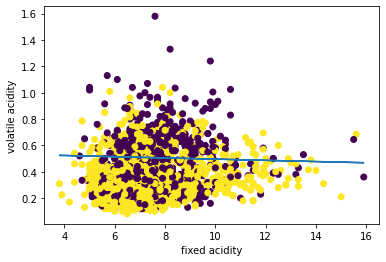

Model accuracy for removed NaN method and LR =  0.1  : 66.25967837998809


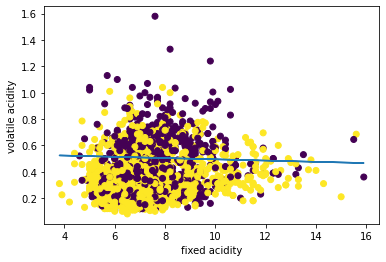

Model accuracy for removed NaN method and LR =  1  : 66.49791542584872


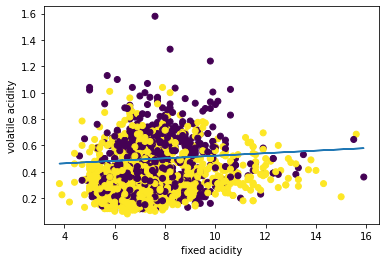

Model accuracy for removed NaN method and LR =  10  : 66.43835616438356


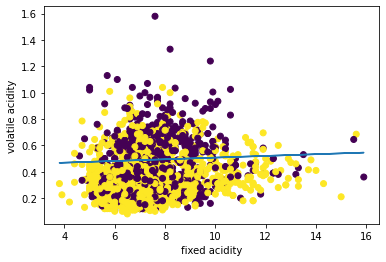

Model accuracy for replaced NaN method and LR =  0.01  : 62.92134831460674


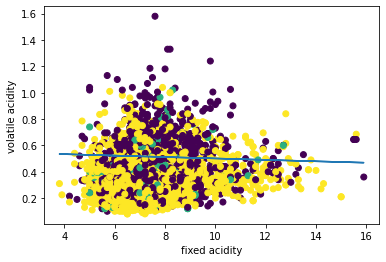

Model accuracy for replaced NaN method and LR =  0.1  : 62.92134831460674


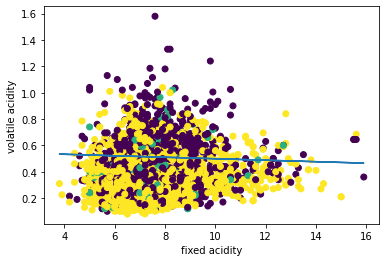

Model accuracy for replaced NaN method and LR =  1  : 62.70586424503617


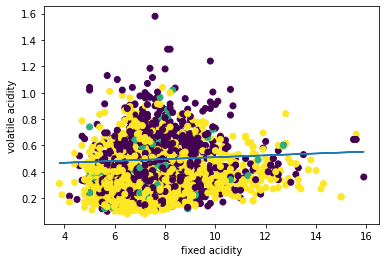

Model accuracy for replaced NaN method and LR =  10  : 38.340772664306606


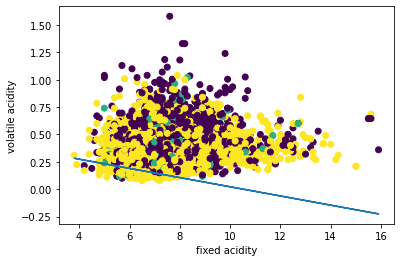

In [200]:
# for removed NaN method
for LR in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(LR)
    out_model, W_model = model.fit(XL_1, YL_1)
    print('Model accuracy for removed NaN method and LR = ',LR,' :', (YL_1 == out_model).sum() / len(YL_1) * 100)

    plt.figure()
    plt.scatter(XL_1[:, 0], XL_1[:, 1], c = YL_1)
    plt.plot(XL_1[:, 0], -W_model[1] / W_model[2] * XL_1[:, 0] - W_model[0] / W_model[2])
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    plt.show()
    
# for replaced NaN method
for LR in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(LR)
    out_model, W_model = model.fit(XL_2, YL_2)
    print('Model accuracy for replaced NaN method and LR = ',LR,' :', (YL_2 == out_model).sum() / len(YL_2) * 100)

    plt.figure()
    plt.scatter(XL_2[:, 0], XL_2[:, 1], c = YL_2)
    plt.plot(XL_2[:, 0], -W_model[1] / W_model[2] * XL_2[:, 0] - W_model[0] / W_model[2])
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    plt.show()

### Accuracy report without outlier data for lr = {0.01, 0.1, 1, 10}

Model accuracy for removed NaN method and LR =  0.01  : 66.49166151945646


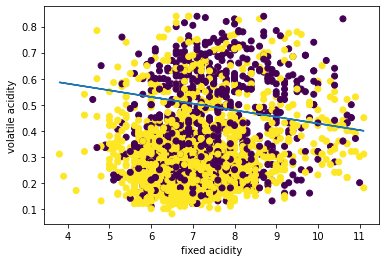

Model accuracy for removed NaN method and LR =  0.1  : 66.52254478072884


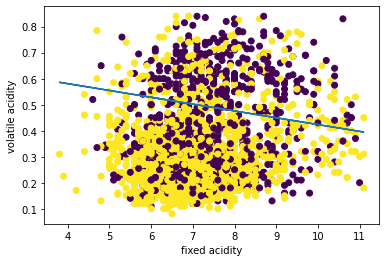

Model accuracy for removed NaN method and LR =  1  : 63.650401482396546


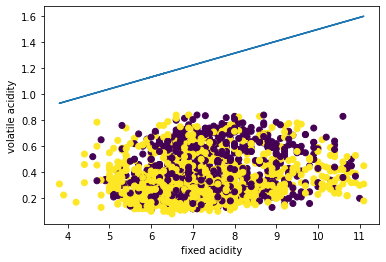

Model accuracy for removed NaN method and LR =  10  : 66.21371216800495


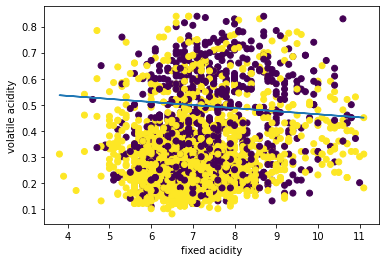

Model accuracy for replaced NaN method and LR =  0.01  : 62.67347264316477


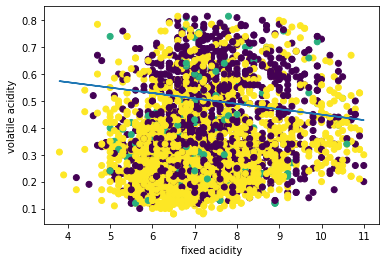

Model accuracy for replaced NaN method and LR =  0.1  : 62.80108470250438


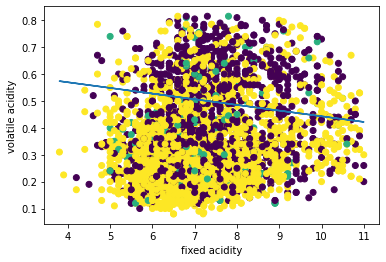

Model accuracy for replaced NaN method and LR =  1  : 62.56181209124262


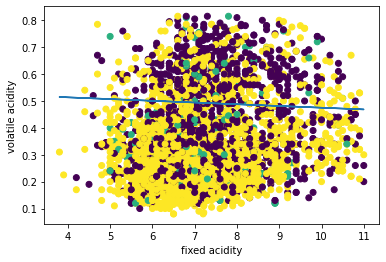

Model accuracy for replaced NaN method and LR =  10  : 62.52990907640772


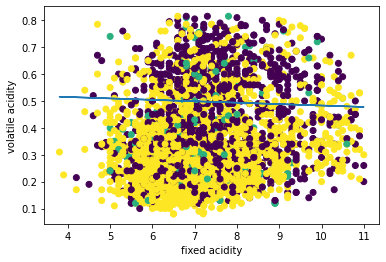

In [201]:
# for removed NaN method
non_outlier_id = X1[['fixed acidity', 'volatile acidity']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
XL_1_no = XL_1[non_outlier_id]
YL_1_no = YL_1[non_outlier_id]

for LR in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(LR)
    out_model, W_model = model.fit(XL_1_no, YL_1_no)
    print('Model accuracy for removed NaN method and LR = ',LR,' :', (YL_1_no == out_model).sum() / len(YL_1_no) * 100)

    plt.figure()
    plt.scatter(XL_1_no[:, 0], XL_1_no[:, 1], c = YL_1_no)
    plt.plot(XL_1_no[:, 0], -W_model[1] / W_model[2] * XL_1_no[:, 0] - W_model[0] / W_model[2])
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    plt.show()
    
# for replaced NaN method
non_outlier_id = X2[['fixed acidity', 'volatile acidity']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
XL_2_no = XL_2[non_outlier_id]
YL_2_no = YL_2[non_outlier_id]

for LR in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(LR)
    out_model, W_model = model.fit(XL_2_no, YL_2_no)
    print('Model accuracy for replaced NaN method and LR = ',LR,' :', (YL_2_no == out_model).sum() / len(YL_2_no) * 100)

    plt.figure()
    plt.scatter(XL_2_no[:, 0], XL_2_no[:, 1], c = YL_2_no)
    plt.plot(XL_2_no[:, 0], -W_model[1] / W_model[2] * XL_2_no[:, 0] - W_model[0] / W_model[2])
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    plt.show()

## 3. Online Linear Regression 

In this question you will simulate an online linear regressor.
For more informain refer to the HW description file.

In the code cell below you should prepare your data as introduced in the first part of 'Linear Regression' question.
For convenience, you may load the whole original dataset and do the jobs required from beginning on the original given data in the HW folder or you can use results from previous parts.

In [107]:
X = data_nan_drop[['fixed acidity', 'volatile acidity', 'citric acid']][:370].values
Y = data_nan_drop['A Indx'][:370].values

In the code block below you should write your funcion which is a Gradient Descent optimizer.

In [113]:
def GD(X, y, ETA, W, max_iteration, min_error):
    s_n = X.shape[0]
    X = np.c_[X, np.ones(s_n)]
    y_tmp = np.dot(X, W)
    MSE = np.sum(np.power((y - y_tmp), 2)) / s_n
    
    i = 1
    while i <= max_iteration and MSE > min_error:
        dW = -2 * np.dot(y - y_tmp, X) / s_n
        W = W - dW * ETA # this formula can either have division by 2 but use this based on question formula 
        y_tmp = np.dot(X, W)
        MSE = np.sum(np.power((y - y_tmp), 2)) / s_n
        i = i + 1
        
    return W, np.round(MSE, 3), i

Use your Gradient Descent function to find a (w,b) that satisfies the criteria introduced in the HW description file. Please note that you must set initial point for your optimizer at [5,-5,5,-5].

In [161]:
X_train = X[:300, :]
Y_train = Y[:300]

# Gradient Descent Algorithm setting
ETA = 0.0184
W = [5, -5, 5, -5]
max_iteration = 100000
min_error = 0.095

W, MSE, i = GD(X_train, Y_train, ETA, W, max_iteration, min_error)
print('W =', W, '\n')
print('MSE =', MSE, '\n')
print('GD iteration number  =', i)

W = [ 2.08240253  0.45493249  2.90068379 -0.07534161] 

MSE = 0.095 

GD iteration number  = 3026


Now, let's go toward SGD! Please writw your code for implementing type 1 SGD (eta-constant type) below.

In [123]:
def SGD(X, y, ETA, W):
    out = np.dot(X, W)
    dW = -2 * np.dot(y - out, X)
    W = W - dW * ETA
    return W

W = [ 2.09244714  0.45508428  2.90049361 -0.07586096] 

MSE(70) = 0.09705305795511993 

Learning rate = 0.0184 



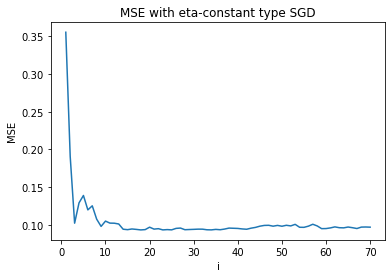

In [162]:
# now we iterate over 301 to 370 data to plot their online MSE 

n_s = X.shape[0]
X_online = np.c_[X, np.ones(n_s)]
Y_online = Y
ETA = 0.0184

# Start from last part W
W_online = W

for i in range(70):
    W_tmp = SGD(X_online[300 + i, :], Y_online[300 + i], ETA, W_online)
    if i == 0:
        W_online = W_tmp # initial W after watching 300+ first sample
        out = np.dot(X_online, W_online) # output prediction
        MSE = np.array(np.sum(np.power((Y_online - out), 2)) / n_s) # initial MSE array
    else:
        W_online = i / (i + 1) * W_online + 1 / (i + 1) * W_tmp # update W online
        out = np.dot(X_online, W_online) # output prediction
        MSE = np.append(MSE, np.sum(np.power((Y_online - out), 2)) / n_s) # append MSE after watching 300+i't sample

MSE1 = MSE # This MSE result is needed for the last part

# plotting result        
plt.plot(np.array(range(70)) + 1, MSE)
plt.title('MSE with eta-constant type SGD')
plt.xlabel('i')
plt.ylabel('MSE')

print('W =', W_online, '\n')
print('MSE(70) =', MSE[-1], '\n')
print('Learning rate =', ETA, '\n')

Please write your code for implementing type 2 SGD (eta-variable type) below.

W = [ 2.0881023   0.45445726  2.90000918 -0.07622969] 

MSE(70) = 0.09416620605059303 

Learning rate = 0.0184 



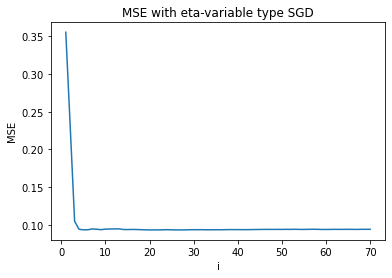

In [163]:
# This part is exactly like the last part, just we updated ETA formula

n_s = X.shape[0]
X_online = np.c_[X, np.ones(n_s)]
Y_online = Y
ETA = 0.0184

# Start from last part W
W_online = W

for i in range(70):
    W_tmp = SGD(X_online[300 + i, :], Y_online[300 + i], ETA / np.sqrt(i+1) , W_online)
    if i == 0:
        W_online = W_tmp # initial W after watching 300+ first sample
        out = np.dot(X_online, W_online) # output prediction
        MSE = np.array(np.sum(np.power((Y_online - out), 2)) / n_s) # initial MSE array
    else:
        W_online = i / (i + 1) * W_online + 1 / (i + 1) * W_tmp # update W online
        out = np.dot(X_online, W_online) # output prediction
        MSE = np.append(MSE, np.sum(np.power((Y_online - out), 2)) / n_s) # append MSE after watching 300+i't sample
        
MSE2 = MSE # This MSE result is needed for the last part

# plotting result        
plt.plot(np.array(range(70)) + 1, MSE)
plt.title('MSE with eta-variable type SGD')
plt.xlabel('i')
plt.ylabel('MSE')

print('W =', W_online, '\n')
print('MSE(70) =', MSE[-1], '\n')
print('Learning rate =', ETA, '\n')

Below, you may provide the plots requested in the last part of the question.

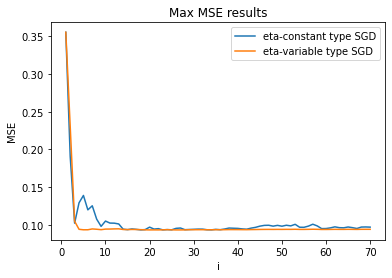

In [165]:
# we saved MSE1 and MSE2 from last part so we just plot them

# plotting result        
plt.plot(np.array(range(70)) + 1, MSE1)
plt.plot(np.array(range(70)) + 1, MSE2)
plt.title('Max MSE results')
plt.xlabel('i')
plt.ylabel('MSE')
plt.legend(['eta-constant type SGD', 'eta-variable type SGD'])